In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [21]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2643 - accuracy: 0.9238
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1089 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.9760


In [25]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0942 - accuracy: 0.9714
0.09422831982374191
0.9714000225067139


1/1 [==============================] - 0s 51ms/step
This didgit is probably a 2


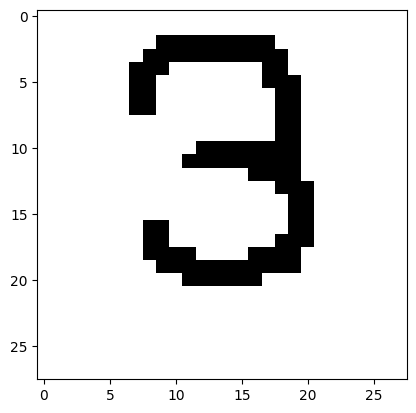

1/1 [==============================] - 0s 24ms/step
This didgit is probably a 2


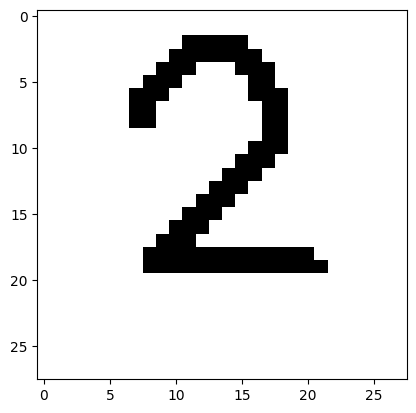

1/1 [==============================] - 0s 56ms/step
This didgit is probably a 2


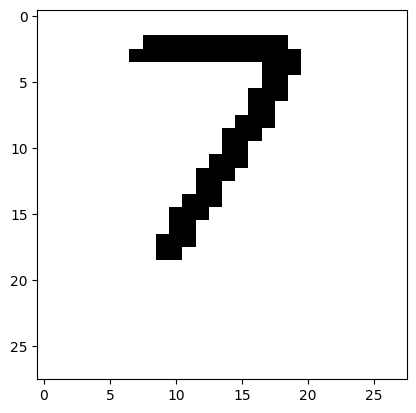

1/1 [==============================] - 0s 52ms/step
This didgit is probably a 6


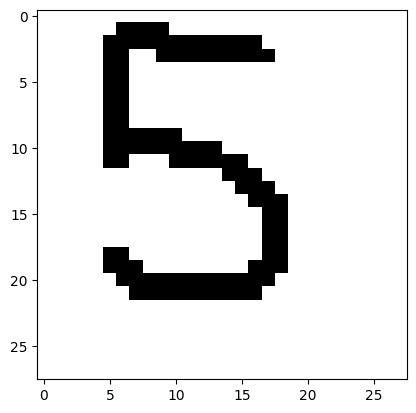

1/1 [==============================] - 0s 40ms/step
This didgit is probably a 5


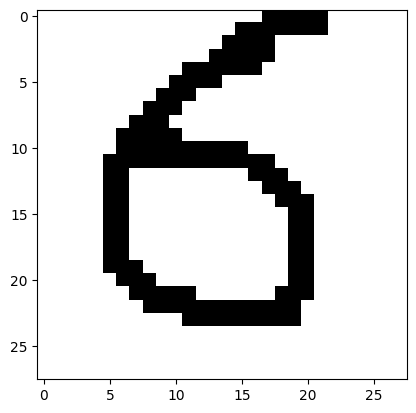

1/1 [==============================] - 0s 24ms/step
This didgit is probably a 6


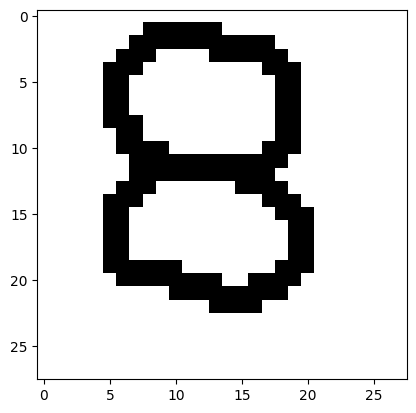

1/1 [==============================] - 0s 40ms/step
This didgit is probably a 8


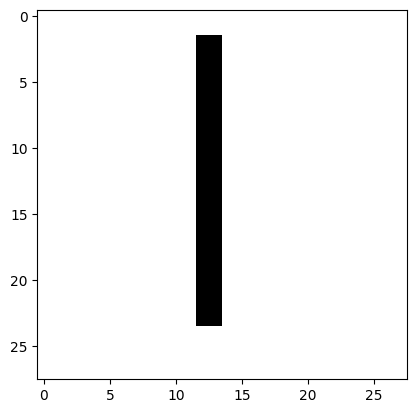

In [27]:
img_no = 1
while os.path.isfile(f"digits/digit{img_no}.png"):
    try:
        img = cv2.imread(f"digits/digit{img_no}.png")[:,:,0]
        img = np.invert(np.array([img]))
        pred = model.predict(img)
        print(f"This didgit is probably a {np.argmax(pred)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error!")
    finally:
        img_no +=1